#  Summer Research \# 4
## Spectral Methods

#### Executive Summary
** Insert Executive Summary Here **

### Code from Spectral Methods Trefethan


In [2]:
import time
import numpy as np
import numpy.linalg as npla
import matplotlib.pyplot as plt
import scipy as sp
import scipy.linalg as spla
import scipy.sparse as sps
from scipy import special

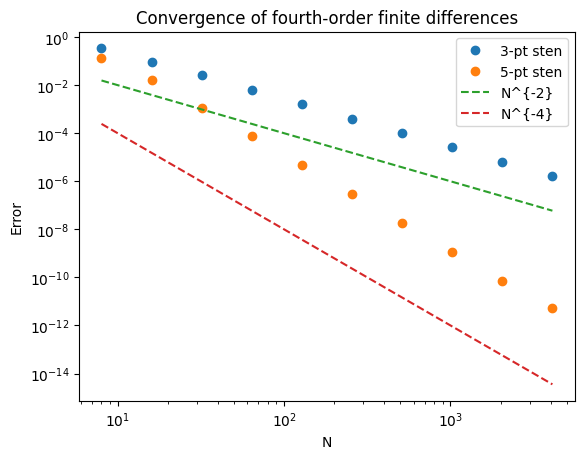

In [2]:
# p1.py - convergence of fourth-order finite differences

# For various N, set up grid in [-pi,pi] and function u(x):
Nvec = np.logspace(3.0,12.0 , num=10, base=2.0)
err2 = np.zeros(len(Nvec))
err4 = np.zeros(len(Nvec))

for n in range(len(Nvec)):
    h = 2*np.pi/Nvec[n]
    x = -np.pi + np.arange(Nvec[n]) * h
    u = np.exp(np.sin(x))
    du = np.cos(x) * u
    # Construct sparse fourth-order differentiation matrix:
    nn = int(Nvec[n])
    e = np.ones(nn)
    row =  np.arange(nn)
    col1 = np.append(row[1:],row[:1])
    col2 = np.append(row[2:],row[:2])
    D2 = sps.csr_array((e/2, (row,col1)), shape = (nn,nn))
    D2 = (D2-D2.T)/h
    D2u = D2.dot(u)
    D4 = sps.csr_array((2*e/3, (row,col1)), shape = (nn,nn)) - sps.csr_array((e/12, (row,col2)), shape = (nn,nn))
    D4 = (D4-D4.T)/h
    D4u = D4.dot(u)
    err2[n] = np.linalg.norm(D2u - du, np.inf)
    err4[n] = np.linalg.norm(D4u - du, np.inf)

plt.loglog(Nvec,err2, 'o', label = '3-pt sten')
plt.loglog(Nvec,err4, 'o', label = '5-pt sten')
plt.loglog(Nvec,Nvec**(-2),'--', label='N^{-2}')
plt.loglog(Nvec,Nvec**(-4),'--', label='N^{-4}')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Convergence of fourth-order finite differences')
plt.legend()
plt.show()

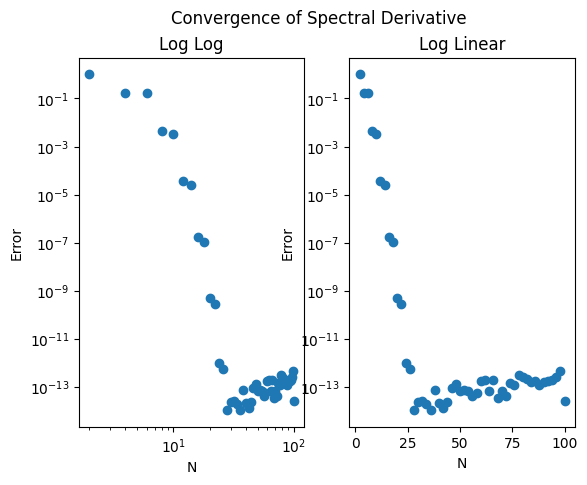

In [3]:
# p2.py - convergence of periodic spectral method (compare pl.m)
# For various N (even), set up grid as before:
Nvec = np.arange(2,101,2)
err = np.zeros(len(Nvec))

for n in range(len(Nvec)):
    h = 2*np.pi/Nvec[n]
    x = -np.pi + np.arange(Nvec[n]) * h
    u = np.exp(np.sin(x))
    du = np.cos(x) * u
    # Construct spectral differentiaion matrix:
    nn = int(Nvec[n])
    na = np.arange(1,nn)
    column = np.append(0,np.array([0.5*(-1)**(na) / np.tan(na*h/2)]))
    #D = spla.toeplitz(column,column([1 N:-1:2]))
    D = spla.circulant(column)
    Du = D.dot(u)

    err[n] = np.linalg.norm(Du - du, np.inf)



plt.figure()
plt.subplot(121)
plt.loglog(Nvec,err, 'o', label = '5-pt sten')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Log Log')


plt.subplot(122)
plt.semilogy(Nvec,err, 'o', label = '5-pt sten')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Log Linear')
plt.suptitle('Convergence of Spectral Derivative')
plt.show()


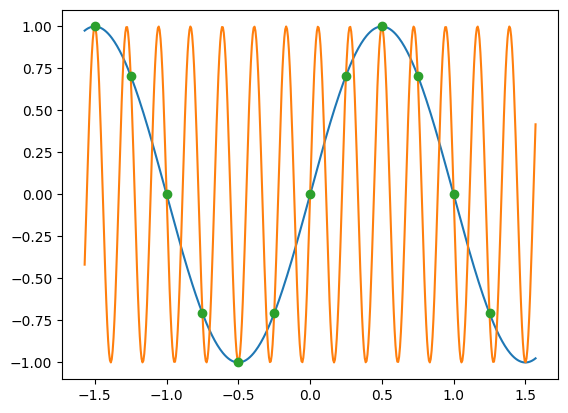

In [4]:
x = np.linspace(-np.pi/2, np.pi/2, 500)
y = np.arange(-1.5,1.5, 0.25)
f1 = np.sin(np.pi * x)
f11 = np.sin(np.pi * y)
#f2 = np.sin(17*np.pi * x)
f3 = np.sin(9*np.pi * x)

plt.plot(x,f1,x,f3)
plt.plot(y,f11,'o')
plt.show()

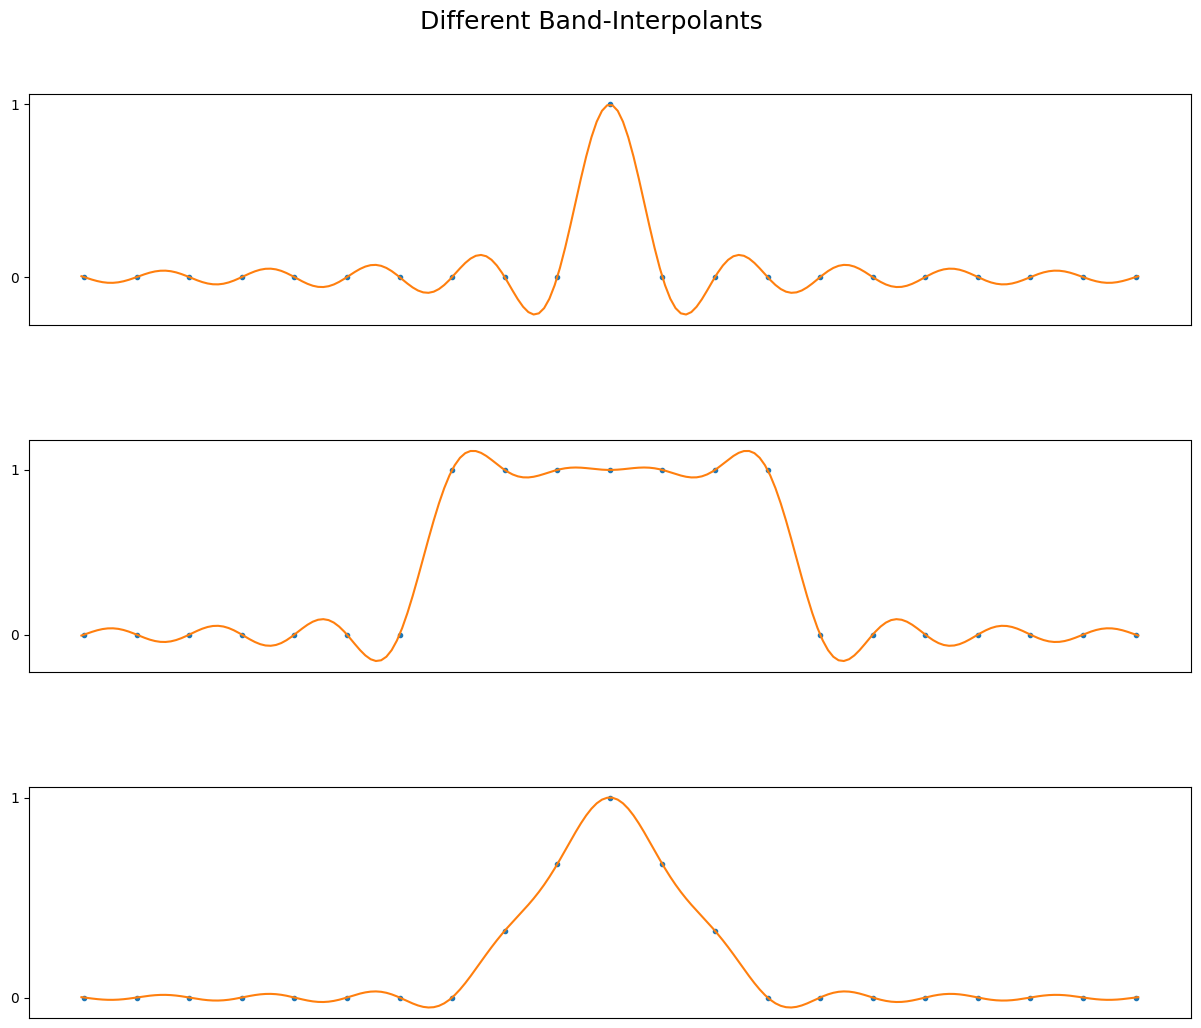

In [5]:
# p3.py - band-limited interpolation
h, xmax =1, 10
x = np.arange(-xmax,xmax+1,h) # computational grid
xx = np.arange(-xmax-h/20,xmax + h/10, h/10) # plotting grid

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Different Band-Interpolants', fontsize=18, y=0.95)

for plo in range(3):
    match plo:
        case 0:
            v = x==0           # delta function
        case 1:
            v = np.abs(x)<=3        # square wave
        case 2:
            v = np.maximum(0,1-np.abs(x)/3) # hat function
        case _:
            print("Number not between 1 and 3")

    ax = plt.subplot(3, 1, plo+1)
    ax.plot(x,v,'.')
    p = np.zeros(len(xx))
    for i in np.arange(len(x)):
        p += v[i]*np.sin(np.pi*(xx-x[i])/h)/(np.pi*(xx-x[i])/h)
    
    ax.plot(xx,p)
    plt.xticks([])
    plt.yticks([0,1])


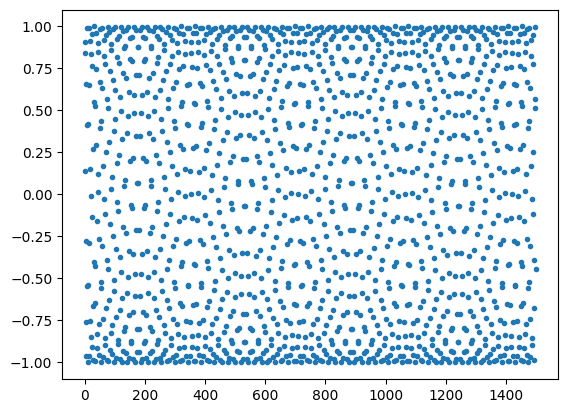

In [6]:
plt.plot (np.sin(np.arange(1,1500)) ,' .')
plt.show()

NameError: name 'dv' is not defined

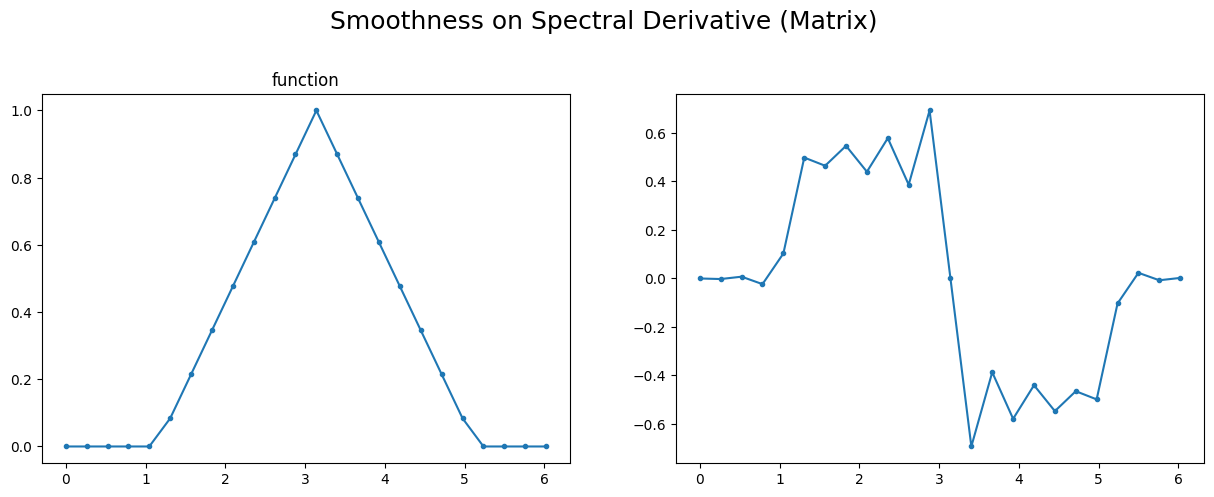

In [4]:
# p4.py - periodic spectral differentiation
# Set up grid and differentiation matrix:
N = 24
h= 2*np.pi/N
x = h*(np.arange(N))

na = np.arange(1,N)
column = np.append(0,np.array([0.5*(-1)**(na) / np.tan(na*h/2)]))
D = spla.circulant(column)

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Smoothness on Spectral Derivative (Matrix)', fontsize=18, y=0.95)

# Differentiation of a hat function:
v = np.maximum(0,1-np.abs(x-np.pi)/2)
ax = plt.subplot(2, 2, 1)
ax.plot(x,v,'.-')
plt.title('function')
#subplot(3,2,1), plot(x,v,'.-','markersize',13)
#axis([0 2*pi -.5 1.5]), grid on, title('function')
ax = plt.subplot(2, 2, 2)
ax.plot(x,D.dot(v),'.-')
error = np.linalg.norm(D.dot(v) - dv, np.inf)
ax.text(4.5, 0.6, 'Error = ' + str(error), horizontalalignment='center', verticalalignment='center')
plt.title('spectral derivative')
#subplot(3,2,2), plot(x,D.dot(v),'.-','markersize',13)
#axis([0 2*pi -1 1]), grid on, title('spectral derivative')

# Differentiation of exp(sin(x)):
v = np.exp(np.sin(x))
dv = np.cos(x)*v
ax = plt.subplot(2, 2, 3)
ax.plot(x,v,'.-')
#subplot(3,2,3), plot(x,v,'.-','markersize',13)
#axis([0 2*pi 0 3]), grid on
ax = plt.subplot(2, 2, 4)
ax.plot(x,D.dot(v),'.-')
#subplot(3,2,4), plot(x,D*v,'.-','markersize',13)
#axis([0 2*pi -2 2]), grid on
error = np.linalg.norm(D.dot(v) - dv, np.inf)
ax.text(4.5, 1.2, 'Error = ' + str(error), horizontalalignment='center', verticalalignment='center')
#text(2.2,1.4,['max error = ' num2str(error)])

plt.show()

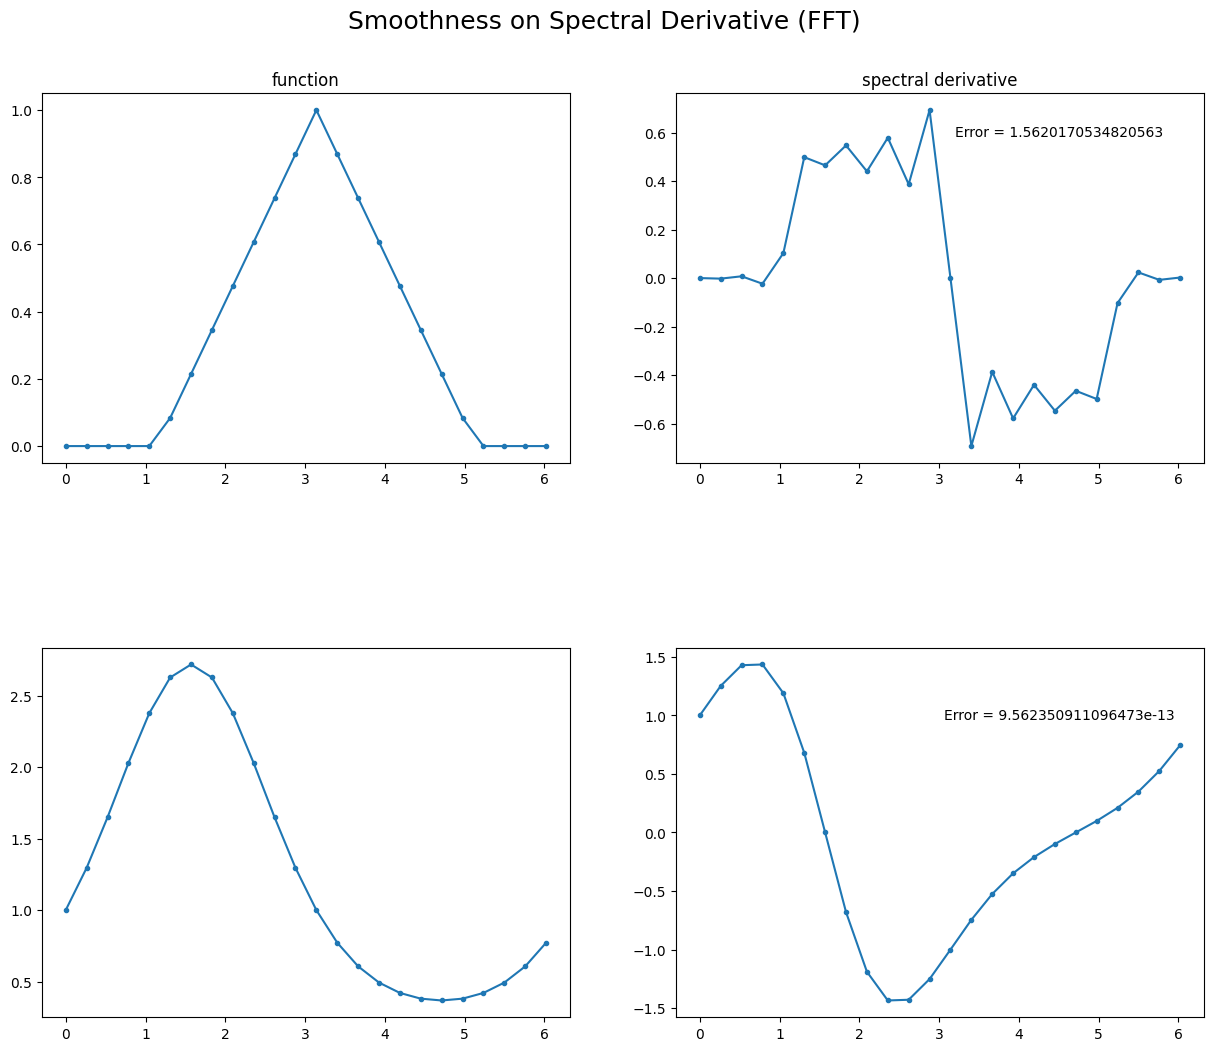

In [8]:
# p5.py - repetition of p4.py via FFT
#For complex v, delete "real" commands.

# Differentiation of a hat function:
N = 24
h = 2* np.pi /N
x = h* np.arange(N)
v = np.maximum(0,1-np.abs(x-np.pi)/2)
v_hat = np.fft.fft(v)
w_hat = 1j * np.append(np.append(np.arange(N/2),0),np.arange(-N/2 + 1, 0)) * v_hat
w = np.real(np.fft.ifft(w_hat))

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Smoothness on Spectral Derivative (FFT)', fontsize=18, y=0.95)

ax = plt.subplot(2, 2, 1)
ax.plot(x,v,'.-')
plt.title('function')
ax = plt.subplot(2, 2, 2)
ax.plot(x,w,'.-')
error = np.linalg.norm(w - v, np.inf)
ax.text(4.5, 0.6, 'Error = ' + str(error), horizontalalignment='center', verticalalignment='center')
plt.title('spectral derivative')

#subplot(3,2,1), plot(x,v,'.-','markersize',13)
#axis([0 2*pi -.5 1.5]), grid on, title('function')
#subplot(3,2,2), plot(x,w,'.-','markersize',13)
#axis([0 2*pi -1 1]), grid on, title('spectral derivative')


# Differentiation of exp(sin(x)):
v = np.exp(np.sin(x))
dv = np.cos(x)*v
v_hat = np.fft.fft(v);
w_hat = 1j * np.append(np.append(np.arange(N/2),0),np.arange(-N/2 + 1, 0)) * v_hat
w = np.real(np.fft.ifft(w_hat))

ax = plt.subplot(2, 2, 3)
ax.plot(x,v,'.-')
ax = plt.subplot(2, 2, 4)
ax.plot(x,w,'.-')
error = np.linalg.norm(w - dv, np.inf)
ax.text(4.5, 1, 'Error = ' + str(error), horizontalalignment='center', verticalalignment='center')


plt.show()


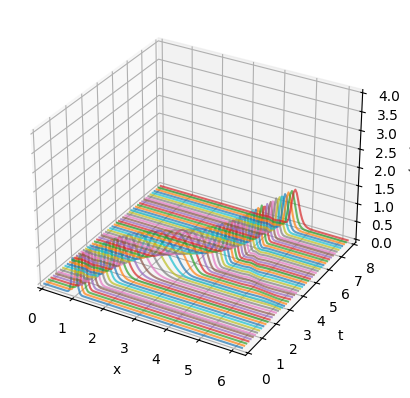

In [9]:
# p6.py - variavle coefficient wave equation

# Grid, variable coefficient, and initial data:
N = 128
h = 2*np.pi/N
x = h*np.arange(N)
t, dt = 0,  h/4
c = 0.2 + np.sin(x-1)**2;
v, vold = np.exp(-100*(x-1)**2) , np.exp(-100*(x-0.2*dt-1)**2)

# Time-stepping by leap frog formula:
tmax, tplot = 8, 0.15
plotgap, nplots = round(tplot/dt), round(tmax/tplot)
dt = tplot/plotgap

data = np.zeros((nplots+1,N))
data[0,:] = v
tdata = t
for i in range(nplots):
    for n in range(plotgap):
        t += dt;
        v_hat = np.fft.fft(v);
        w_hat = 1j * np.append(np.append(np.arange(N/2),0),np.arange(-N/2 + 1, 0)) * v_hat
        w = np.real(np.fft.ifft(w_hat))
        vnew = vold - 2*dt*c * w
        vold = v
        v = vnew

    data[i+1,:] = v
    tdata = np.append(tdata, t)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
for i in np.arange(len(tdata)):
    T = tdata[i]*np.ones(len(x))
    data[i,:] = np.ma.masked_less_equal(data[i,:], 1)
    ax.plot(x, T,data[i,:], alpha = 0.7)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0,tmax])
ax.set_zlim([0,4])
plt.show()


#waterfall(x,tdata,data), view(10,70), colormap([0 0 0])
#axis([0 2*pi 0 tmax 0 5]), ylabel t, zlabel u, grid off

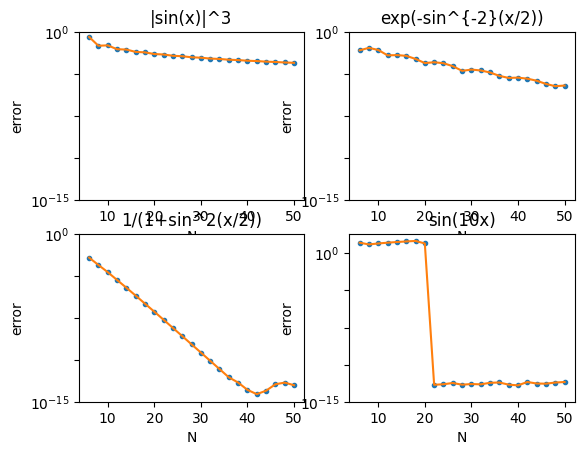

In [10]:
# p7.py - accuracy of periodic spectral differentiation
# Compute derivatives for various values of N:
Nmax = 50 
E = np.zeros((4,int(Nmax/2 - 2)))
for N in np.arange(6,Nmax + 1,2):
    Na = int(N/2 -3)
    h = 2*np.pi/N 
    x = h*np.arange(1,N+1)
    na = np.arange(1,N)
    column = np.append(0,np.array([0.5*(-1)**(na) / np.tan(na*h/2)]))
    D = spla.circulant(column)
    
    v = np.abs(np.sin(x))**3; # 3rd deriv in BV
    vprime = 3*np.sin(x) * np.cos(x) * np.abs(np.sin(x));
    E[0,Na] = np.linalg.norm(D.dot(v)-vprime,np.inf);
    
    v = np.exp(-np.sin(x/2)**(-2)) # C-infinity
    vprime = 0.5*v*np.sin(x)/np.sin(x/2)**4;
    E[1,Na] = np.linalg.norm(D.dot(v)-vprime,np.inf);
    
    v = 1./(1+np.sin(x/2)**2) # analytic in a strip
    vprime = -np.sin(x/2) *np.cos(x/2)*v**2;
    E[2,Na] = np.linalg.norm(D.dot(v)-vprime,np.inf);
    
    v = np.sin(10*x) # band-limited
    vprime = 10*np.cos(10*x) 
    E[3,Na] = np.linalg.norm(D.dot(v)-vprime,np.inf);

# Plot results:
titles = ['|sin(x)|^3','exp(-sin^{-2}(x/2))', '1/(1+sin^2(x/2))','sin(10x)']
for iplot in range(4):
    ax = plt.subplot(2, 2, iplot+1)
    ax.semilogy(np.arange(6,Nmax+1,2),E[iplot,:],'.')
    ax.plot(np.arange(6,Nmax+1,2),E[iplot,:])
    plt.yticks(np.logspace(0,-15,5))
    plt.xlabel('N')
    plt.ylabel('error')
    plt.title(titles[iplot])


#axis(B) Nmax le-16 1e3]), grid on
#set(gca,'xtick',0:10:Nmax,'ytick',(10)."(-15:5:0))



In [11]:
# p8.py - eigenvalues of harmonic oscillator -u"+x"2 u on R
L = 8; # domain is [-L L], periodic
for N in np.arange(6,37,6):
    h = 2*np.pi/N 
    x = h*np.arange(1,N+1)
    x = L*(x-np.pi)/np.pi
    column = np.append(-np.pi**2/(3*h**2)-1/6, -0.5*(-1)**np.arange(1,N)/np.sin(h*np.arange(1,N)/2)**2);
    D2 = (np.pi/L)**2*spla.circulant(column); # 2nd-order differentiation
    eigenvalues = np.linalg.eigvalsh(-D2 + np.diag(x**2))
    print('N = %3d : ' % N, eigenvalues[0:4])


N =   6 :  [ 0.46147292  7.49413462  7.72091605 28.83248378]
N =  12 :  [0.97813728 3.17160532 4.45593529 8.92452906]
N =  18 :  [0.99997    3.00064407 4.99259532 7.0395719 ]
N =  24 :  [1.         3.0000001  4.99999797 7.000025  ]
N =  30 :  [1. 3. 5. 7.]
N =  36 :  [1. 3. 5. 7.]


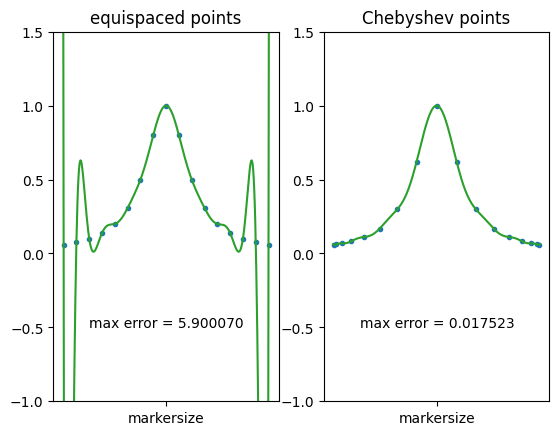

In [12]:
# p9.py - polynomial interpolation in equispaced and Chebyshev pts

N = 16;
xx = np.arange(-1.01, 1.0105, 0.005)
for i in range(1,3):
    if i==1:
        s = 'equispaced points'
        x = -1 + 2*np.arange(N+1)/N
    if i==2:
        s = 'Chebyshev points' 
        x = np.cos(np.pi*np.arange(N+1)/N)
    plt.subplot(1,2,i)
    u = 1./(1+16*x**2);
    uu = 1./(1+16*xx**2);
    p = np.polyfit(x,u,N); # interpolation
    pp = np.polyval(p,xx) # evaluation of interpolant
    plt.plot(x,u,'.','markersize',13)
    plt.plot(xx,pp)
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1,1.5])
    plt.title(s)
    error = np.linalg.norm(uu-pp,np.inf);
    plt.text(-.75,-.5,'max error = %1.6f' % error)


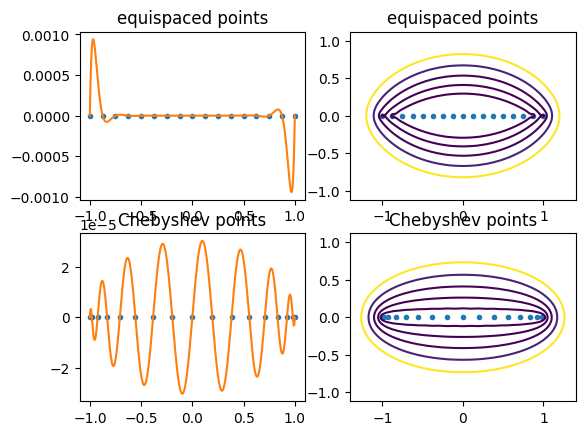

In [13]:
# p10.py - polynomials and corresponding equipotential curves

N = 16
for i in range(1,3):
    if i==1:
        s = 'equispaced points'
        x = -1 + 2*np.arange(N+1)/N
    if i==2:
        s = 'Chebyshev points'
        x = np.cos(np.pi*np.arange(N+1)/N)
        
    p = np.poly(x)
    # Plot p(x) over [-1,1]:
    xx = np.arange(-1.,1.0001,0.005)
    pp = np.polyval(p,xx);
    plt.subplot(2,2,2*i-1)
    plt.plot(x,0*x,'.')
    plt.plot(xx,pp)
    plt.xticks(np.arange(-1,1.01,0.5))
    plt.title(s)
    #set(gca,'xtick',-1:.5:1), title(s)
    # Plot equipotential curves:
    plt.subplot(2,2,2*i)
    plt.plot(np.real(x),np.imag(x),'.')
    plt.xlim([-1.4, 1.4])
    plt.ylim([-1.12, 1.12])
    xgrid = np.arange(-1.4, 1.4, 0.02)
    ygrid = np.arange(-1.12, 1.12, 0.02)
    [xx,yy] = np.meshgrid(xgrid,ygrid)
    zz = xx+1j*yy;
    pp = np.polyval(p,zz)
    levels = np.logspace(-4,0,5)
    plt.contour(xx,yy,np.abs(pp),levels)
    plt.title(s)
    
plt.show()

In [14]:
# CHEB compute D = differention matrix, x = Chebyshev grid
def cheb(N):
    if N == 0:
        D = 0
        x = 1
        
    x = np.cos(np.pi * np.arange(N+1)/N)
    c = np.append(2,np.append(np.ones(N-1),2))
    c *= (-1)** np.arange(N+1)
    X = np.tile(x, (N+1,1)).T 
    dX = X - X.T
    D = np.outer(c,(1./c)) / (dX + np.eye(N+1))   # off-diagonal entries
    D -= np.diag(np.sum(D, 1))                      # diagonal entries
                     
    return D, x
        

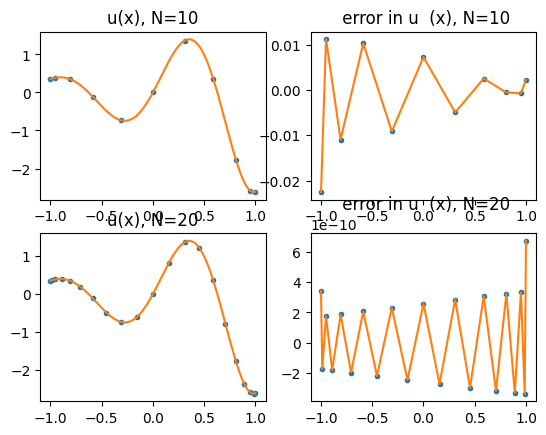

In [15]:
# p11.py - Chebyshev differentation of a smooth function

xx = np.arange(-1,1.01,.01) 
uu = np.exp(xx)*np.sin(5*xx)
for N in range(10,21,10):
    D, x = cheb(N) 
    u = np.exp(x) * np.sin(5*x)
    plt.subplot(2,2, int(2*N/10-1))
    #subplot('position',[.15 .66-.4*(N==20) .31 .28])
    plt.plot(x,u,'.')
    plt.plot(xx,uu)
    plt.title('u(x), N=' + str(N))
    error = D.dot(u) - np.exp(x)*(np.sin(5*x)+5*np.cos(5*x))
    plt.subplot(2,2, int(2*N/10 ))
    #subplot('position',[.55 .66-.4*(N==20) .31 .28])
    plt.plot(x,error,'.')
    plt.plot(x,error)
    plt.title(' error in u '' (x), N=' + str(N))

plt.show()

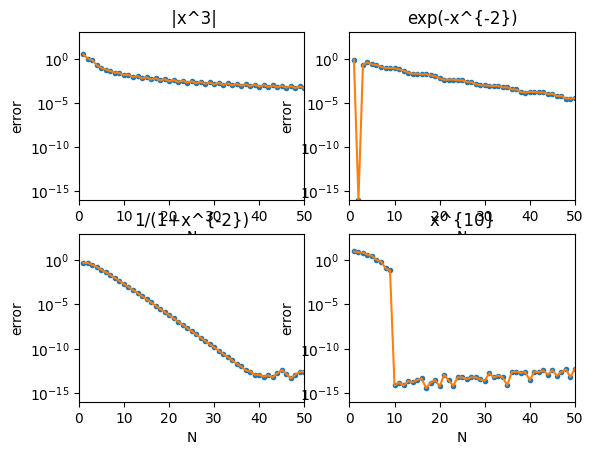

In [16]:
# p12.py - accuracy of Chebyshev spectral differentiation
# (compare p7.py)

# Compute derivatives for various values of N:
Nmax = 50
E = np.zeros((4,Nmax+1))
for N in range(1,Nmax+1):
    D,x = cheb(N)

    # 3rd deriv in BV
    v = np.abs(x)**3
    vprime = 3*x*np.abs(x) 
    E[0,N] = npla.norm(D.dot(v)-vprime,np.inf)

    # C-infinity
    v = np.exp(-x**(-2))
    vprime = 2*v/x**3;
    E[1,N] = npla.norm(D.dot(v)-vprime,np.inf)

    # analytic in [-1,1]
    v = 1./(1 + x**2)
    vprime = -2*x* v**2;
    E[2,N] = npla.norm(D.dot(v)-vprime,np.inf)

    # polynomial
    v = x**10
    vprime = 10*x**9
    E[3,N] = npla.norm(D.dot(v) - vprime,np.inf)
    
# Plot results:
titles = [' |x^3|','exp(-x^{-2})','1/(1+x^{-2})','x^{10}']
for iplot in range(4):
    ax = plt.subplot(2,2,iplot+1)
    ax.semilogy(np.arange(Nmax+1),E[iplot,:],'.')
    ax.plot(np.arange(1,Nmax+1),E[iplot,1:])
    plt.xlim([0, Nmax])
    plt.ylim([1e-16, 1e3])
    plt.xticks(np.arange(0,Nmax+1,10))
    plt.yticks(np.logspace(-15,0,4))
    plt.xlabel('N')
    plt.ylabel('error')
    plt.title(titles[iplot])

plt.show()


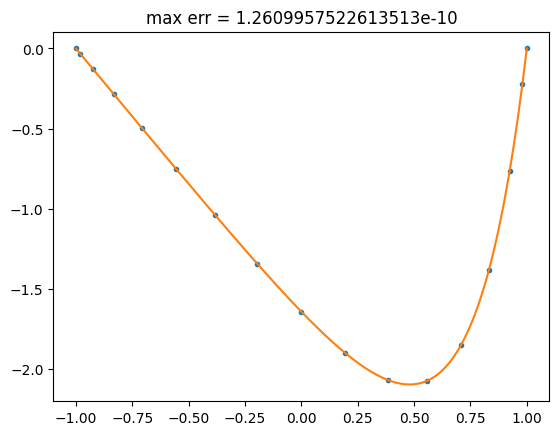

In [17]:
# Program 13

# p13.py - solve linear BVP u_xx = exp(4x)m u(-1)=u(1)=0
N = 16
D,x = cheb(N)
D2 = D @ D
D2 = D2[1:-1,1:-1] # boundary conditions
f = np.exp(4*x[1:-1])
u = npla.inv(D2).dot(f)
u = np.append(0,np.append(u,0))
plt.plot(x,u,'.')
xx = np.arange(-1.,1.01,0.01)
uu = np.polyval(np.polyfit(x,u,N),xx) # interpolate grid data
plt.plot(xx,uu)

exact = ( np.exp(4*xx) - np.sinh(4)*xx - np.cosh(4) )/16;
plt.title('max err = ' +  str(npla.norm(uu-exact,np.inf)))
plt.show()

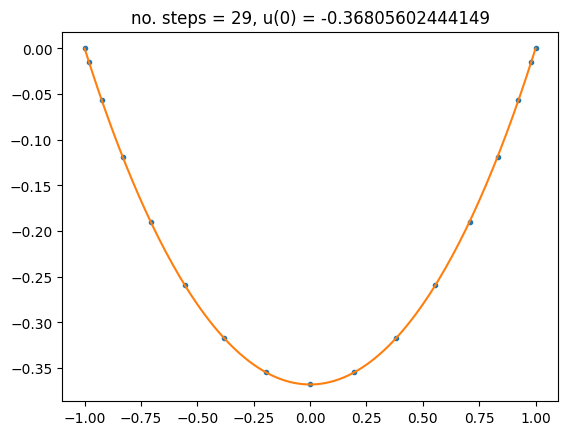

In [18]:
# Program 14
# p14.py - solve nonlinear BVP u_xx = exp(u), u(-10 = u(1)=0
# (compare to p13.py)

N = 16
D,x = cheb(N)
D2 = D @ D
D2 = D2[1:-1,1:-1]
u = np.zeros((N-1,1))
change = 1
it = 0;
while change > 1e-15: # fixed-point iteration
    unew = npla.inv(D2).dot(np.exp(u));
    change = npla.norm(unew-u,np.inf);
    u = unew 
    it += 1

u = np.append(0,np.append(u,0))
plt.plot(x,u,'.')
xx = np.arange(-1.,1.01,0.01)
uu = np.polyval(np.polyfit(x,u,N),xx);
plt.plot(xx,uu)
plt.title('no. steps = %2i, u(0) =%18.14f' % (it, u[int(N/2)]))
plt.show()

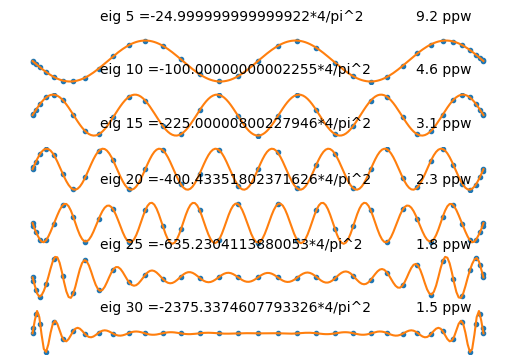

In [19]:
# Program 15
# p15.py - solve eigenvalue BVP u_xx = lambda*u, u(-1)=u(1)=0
N = 36
D,x = cheb(N)
D2 = D @ D
D2 = D2[1:-1,1:-1]
Lam,V = npla.eig(D2)
foo = np.sort(-Lam) # sort eigenvalues and -vectors
ii = np.argsort(-Lam)
Lam = Lam[ii]
V = V[:,ii]
for j in np.arange(5,31,5): # plot 6 eigenvectors
    u = np.append(0,np.append(V[:,j],0))
    pos = int(j/5)
    ax = plt.subplot(7,1,pos)           
    ax.plot(x,u,'.')
    xx = np.arange(-1.0,1.01, 0.01)
    uu = np.polyval(np.polyfit(x,u,N),xx);
    ax.plot(xx,uu)
    ax.grid(False)
    ax.axis('off')
    s1 = str(Lam[j-1]*4/np.pi**2)
    plt.text(-.7,.5, 'eig ' + str(j) + ' =' + s1 + '*4/pi^2')
    s2 = str(np.round(4*N/(np.pi*(j)),1))
    plt.text(.7,.5, s2 + ' ppw ')


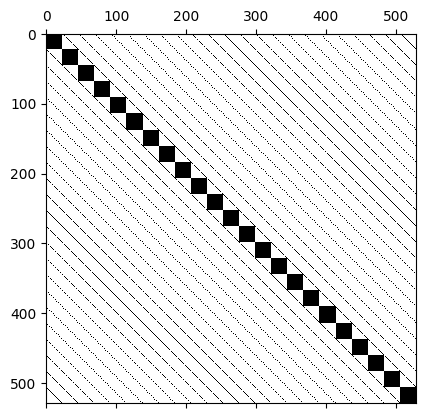

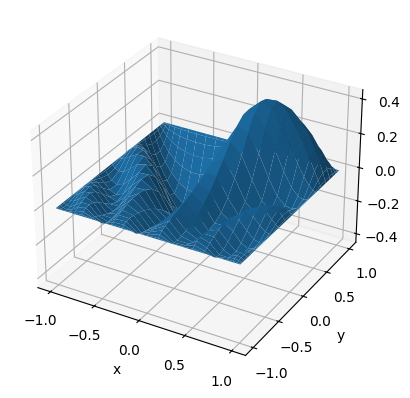

In [20]:
# Program 16
# p16.py - Poisson eq. on [-1,1]x[-1,1] with u=0 on boundary
# Set up grids and tensor product Laplacian and solve for u:
N = 24
D,x = cheb(N)
y = x
xx,yy = np.meshgrid(x[1:-1],y[1:-1])
xx, yy= np.reshape(xx,(1,(N-1)**2)), np.reshape(yy, (1,(N-1)**2)) # stretch 2D grids to 1D vectors
f = 10*np.sin(8*xx*(yy-1)).T
D2 = D @ D
D2 = D2[1:-1,1:-1]
I = np.eye(N-1)
L = np.kron(I,D2) + np.kron(D2,I) # Laplacian
plt.spy(L)

u = npla.inv(L).dot(f) # solve problem and watch the clock
# Reshape long 1D results onto 2D grid:
uu = np.zeros((N+1,N+1))
uu[1:-1,1:-1] = np.reshape(u,(N-1,N-1))
xx,yy = np.meshgrid(x,y)
value = uu[int(N/4),int(N/4)]
# Interpolate to finer grid and plot:
xxx,yyy = np.meshgrid(np.arange(-1.0,1.04, 0.04),np.arange(-1.0,1.04, 0.04))
interp = sp.interpolate.RegularGridInterpolator((x,y),uu, method = 'linear',  bounds_error=False)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx,yy,uu)
#ax.plot_surface(xxx,yyy,interp((xxx,yyy)))
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('u')
plt.show()
#text(.4,-.3,-.3,sprintf('u(2"{-1/2},2"{-1/2}) = %14.11f',value))

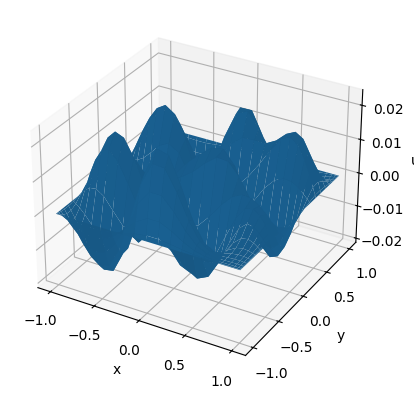

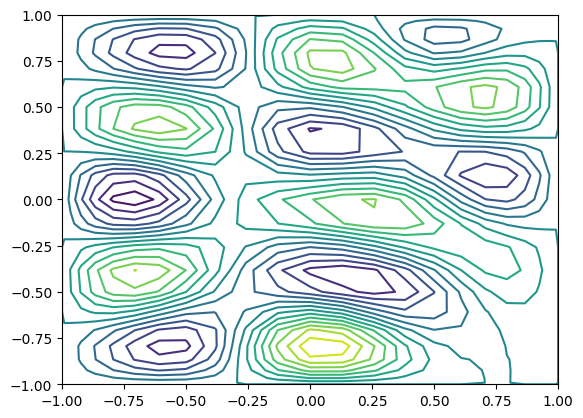

In [21]:
# Program 17
# p17.py - Helmholtz eq. u_xx + u_yy + (k^2)u = f on [-1,1]x[-1,1] 
# (compare p16.m)
# Set up spectral grid and tensor product Helmholtz operator:
N = 24
D,x = cheb(N) 
y = x
xx,yy = np.meshgrid(x[1:-1],y[1:-1])
xx = np.reshape(xx,(1,(N-1)**2))
yy = np.reshape(yy,(1,(N-1)**2))
f = np.exp(-10*((yy-1) **2+(xx- 0.5)**2)).T
D2 = D @ D 
D2 = D2[1:-1,1:-1]
I = np.eye(N-1)
k = 9
L = np.kron(I,D2) + np.kron(D2,I) + k**2* np.eye((N-1)**2);
# Solve for u, reshape to 2D grid, and plot:
u = npla.inv(L).dot(f)
uu = np.zeros((N+1,N+1))
uu[1:-1,1:-1] = np.reshape(u,(N-1,N-1))
xx,yy = np.meshgrid(x,y)
xxx,yyy = np.meshgrid(np.arange(-1.,1.0001,0.0333),np.arange(-1.,1.0001,0.0333))
#uuu = interp2(xx,yy,uu,xxx,yyy,'cubic')


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx,yy,uu)
#ax.plot_surface(xxx,yyy,interp((xxx,yyy)))
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('u')
#text(.2,1,.022,sprintf('u(0,0) = %13.11f',uu(N/2+1,N/2+1)))
plt.figure()
plt.contour(xx,yy,uu,15)

plt.show()

In [22]:
# chebfft.py
# CHEBFFT Chebyshev differentiation via FFT. Simple, not optimal.
# If v is complex, delete "real" commands.

def chebfft(v):
    try:
        N = len(v) - 1
    except:
        w = 0
        return w
    else:
        x = np.cos(np.arange(N+1) * np.pi / N)
        ii = np.arange(N)
        v = np.reshape(v, (len(v),1))
        V = np.append(v, np.flipud(v[np.arange(1,N)])) # transform x -> theta
        U = np.real(np.fft.fft(V))
        W = np.real(np.fft.ifft(1j* np.append(ii, np.append(0, np.arange(1 - N, 0))) * U))
        w = np.zeros(N+1)
        w[1:N] = -W[1:N] / np.sqrt(1 - x[1:N] ** 2)  # transform theta -> x
        w[0] = np.sum(ii ** 2 * U[ii])/ N + 0.5*N*U[N]
        w[N] = np.sum((-1) ** (ii+1) * ii ** 2 * U[ii])/N + 0.5 * (-1) **(N+1) * N * U[N]
        return w

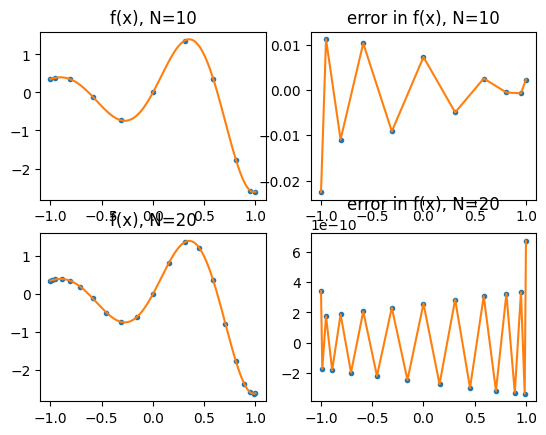

In [23]:
# Program 18
# p18.m - Chebyshev differentiation via FFT (compare p11.m)
xx = np.arange(-1.0,1.01,0.01)
ff = np.exp(xx) * np.sin(5 *xx)
for N in np.arange(10,21,10):
    x = np.cos(np.pi*np.arange(N+1)/N)
    f = np.exp(x) * np.sin(5*x)
    plt.subplot(2,2, int(2*N/10-1))
    #subplot('position',[.15 .66-.4*(N==20) .31 .28])
    plt.plot(x,f,'.')
    plt.plot(xx,ff)
    plt.title('f(x), N=' + str(N))
    error = chebfft(f) - np.exp(x)*(np.sin(5*x)+5*np.cos(5*x))
    plt.subplot(2,2, int(2*N/10))
    #subplot('position',[.55 .66-.4*(N==20) .31 .28])
    plt.plot(x,error,'.')
    plt.plot(x,error)
    plt.title('error in f''(x), N=' + str(N))

## Gegenbauer Time


In [165]:
p = special.gegenbauer(3, 0.5, monic=False)

p

poly1d([ 2.5,  0. , -1.5,  0. ])

In [ ]:
p(1)

In [166]:
x = np.linspace(-3, 3, 400)

y = p(x)

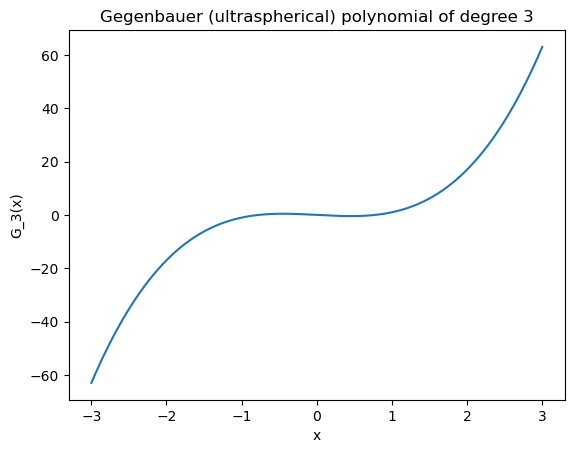

In [167]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_title("Gegenbauer (ultraspherical) polynomial of degree 3")
ax.set_xlabel("x")
ax.set_ylabel("G_3(x)")

plt.show()

Spectral Derivatives another way

In [28]:
from sympy import *

k,x = symbols('k x', real = True)
f = pi**2 - x**2

In [31]:
def fourier_coef(f,k):
    return 1/(2*pi) * Integral(
        (f * exp(I * k * x)), (x,-pi,pi)).doit()

In [35]:
c = {}
k_max = 3
for k_ in range(-k_max, k_max+1):
    c[k_] = fourier_coef(f,k_)
    display(c[k_])

2/9

-1/2

2

2*pi**2/3

2

-1/2

2/9

In [36]:
F = Add(*[c[k_]*exp(I*k_*x) for k_ in c.keys()])
F

2*exp(3*I*x)/9 - exp(2*I*x)/2 + 2*exp(I*x) + 2*pi**2/3 + 2*exp(-I*x) - exp(-2*I*x)/2 + 2*exp(-3*I*x)/9

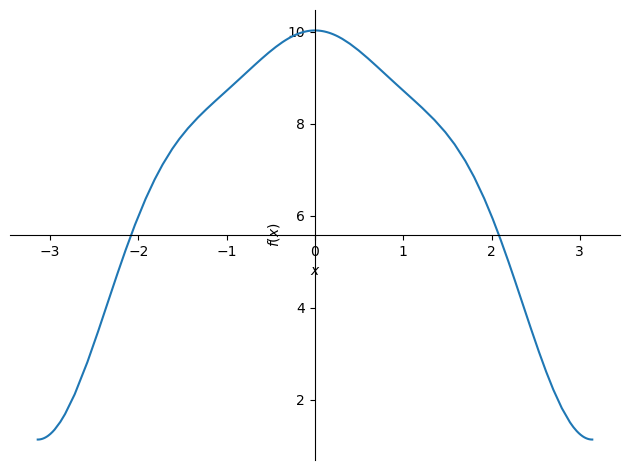

In [37]:
pl = plot(F, (x,-pi,pi))

In [38]:
k_max = 30

c = {k_: fourier_coef(f,k_)
     for k_ in range(-k_max, k_max+1)}

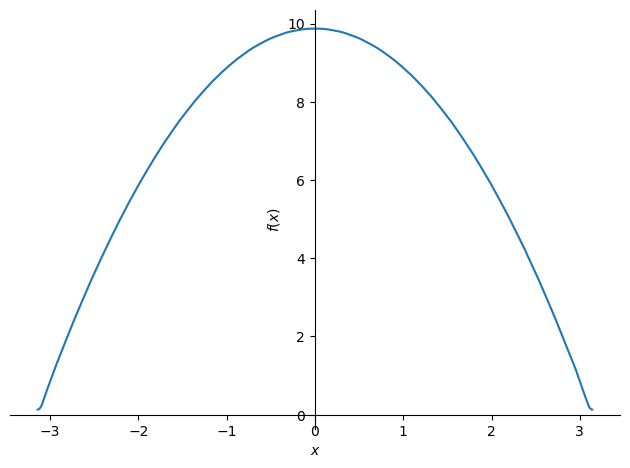

In [39]:
F = Add(*[c[k_]*exp(I*k_*x) for k_ in c.keys()])
pl = plot(F, (x,-pi,pi))

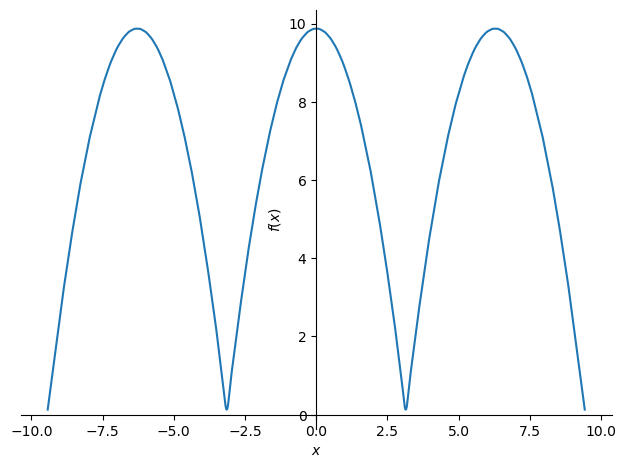

In [40]:
plot(F, (x,-3*pi,3*pi))

In [44]:
F1 = Add(*([I*k_*c[k_]*exp(I*k_*x)
            for k_ in c.keys()]))

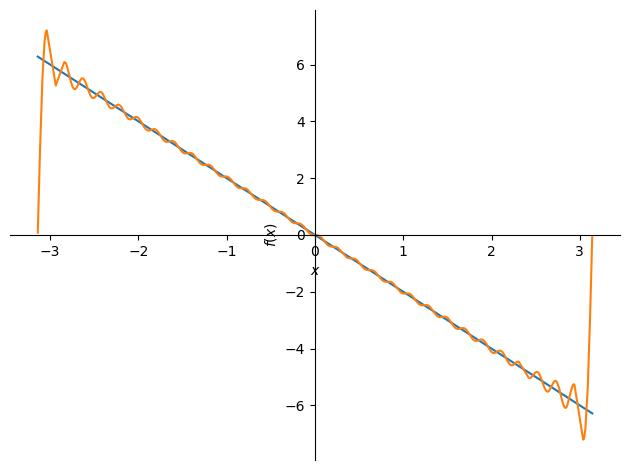

In [45]:
plot(f.diff(x), F1, (x,-pi,pi))